<b>
<p>
<center>
<font size="5">
Machine Learning, Kaggle Competition New York City
</font>
</center>
</p>


# Overview

- Here we will work on kaggle competation [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview)


- Reference for functions:
https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/utilities/p2_shallow_learning/pmlm_utilities_shallow.ipynb

- Pipeline

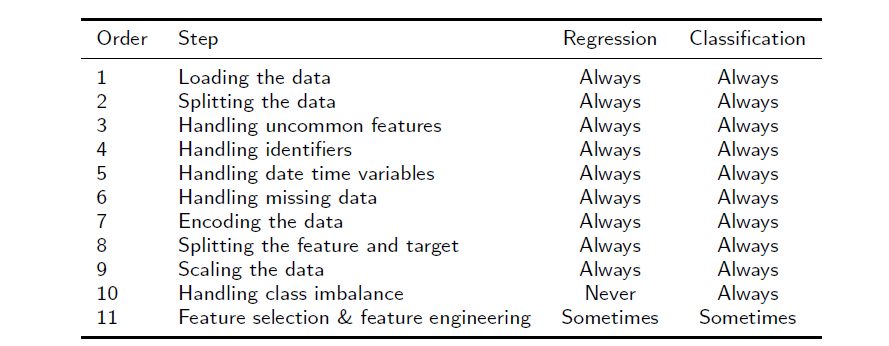

# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/code/models/p2_shallow_learning/'

Mounted at /content/drive


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing
**Note: You will need to specify the date time variables, *datetime_vars*, when handling date time variables**.

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb



/content/drive/My Drive/Colab Notebooks/code/utilities/p2_shallow_learning


In [ ]:
import pandas as pd 
df_raw_train = pd.read_csv(abspath_curr+'/dataset/NYC_Taxi/train.csv' )
df_raw_test = pd.read_csv(abspath_curr+'/dataset/NYC_Taxi/test.csv')

In [ ]:
df_raw_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [ ]:
df_train = df_raw_train.copy(deep=True)
df_test = df_raw_test.copy(deep = True)

In [ ]:
target = 'trip_duration'

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1458644,11


In [ ]:
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,9


In [ ]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
#[Splitting the Data]

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)


In [ ]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1053743,id0458976,2,2016-06-29 18:21:02,2016-06-29 18:39:55,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
273748,id0434613,2,2016-04-25 13:03:26,2016-04-25 13:18:13,1,-73.958038,40.783237,-73.975510,40.760853,N,887
433988,id3809234,2,2016-05-07 12:36:09,2016-05-07 12:47:35,1,-73.969460,40.785519,-73.989243,40.771748,N,686
1442481,id1203705,1,2016-05-14 18:44:17,2016-05-14 18:57:55,1,-73.981743,40.736549,-73.998352,40.726440,N,818
1025834,id1896645,2,2016-04-10 22:51:25,2016-04-10 23:07:16,1,-73.977913,40.752609,-73.975647,40.733139,N,951


In [ ]:
df_val.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
67250,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1397036,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,827
1021087,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,614
951424,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,867
707882,id0140657,1,2016-05-12 17:43:38,2016-05-12 19:06:25,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [ ]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,11


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,11


In [ ]:
df_common_var = common_var_checker(df_train, df_val, df_test,target)
df_common_var

,common var
0,dropoff_latitude
1,dropoff_longitude
2,id
3,passenger_count
4,pickup_datetime
5,pickup_latitude
6,pickup_longitude
7,store_and_fwd_flag
8,trip_duration
9,vendor_id


In [ ]:
np.union1d(df_test.columns,[target])

array(['dropoff_latitude', 'dropoff_longitude', 'id', 'passenger_count',
       'pickup_datetime', 'pickup_latitude', 'pickup_longitude',
       'store_and_fwd_flag', 'trip_duration', 'vendor_id'], dtype=object)

In [ ]:
np.intersect1d(df_train.columns, df_val.columns)

array(['dropoff_datetime', 'dropoff_latitude', 'dropoff_longitude', 'id',
       'passenger_count', 'pickup_datetime', 'pickup_latitude',
       'pickup_longitude', 'store_and_fwd_flag', 'trip_duration',
       'vendor_id'], dtype=object)

In [ ]:
#uncommon_feature_val_not_train_test

In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature
0,dropoff_datetime


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_test_train = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_test_train, columns=['uncommon feature'])

,uncommon feature
0,dropoff_datetime


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0458976,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
1,id0434613,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887
2,id3809234,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686
3,id1203705,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818
4,id1896645,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951


In [ ]:
# Remove the uncommon features from the validation data
# Try uncommon_feature_val_not_test_train 
df_val = df_val.drop(columns=uncommon_feature_val_not_test_train)

# Print the first 5 rows of df_val
df_val.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
# Handling identifiers 

In [ ]:
df = pd.concat([df_train, df_val, df_test])

In [ ]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0458976,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133.0
1,id0434613,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887.0
2,id3809234,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686.0
3,id1203705,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818.0
4,id1896645,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951.0
...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,NaN
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,NaN
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,NaN
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,NaN


In [ ]:
df = pd.concat([df_train,df_val,df_test], sort = False)

In [ ]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0458976,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133.0
1,id0434613,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887.0
2,id3809234,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686.0
3,id1203705,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818.0
4,id1896645,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951.0
...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,NaN
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,NaN
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,NaN
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,NaN


In [ ]:
df_id = id_checker(df)

In [ ]:
df_id.head()

,id
0,id0458976
1,id0434613
2,id3809234
3,id1203705
4,id1896645


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
df_train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
1,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887
2,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686
3,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818
4,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951


In [ ]:
df_test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
df_val.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [ ]:
#pd.to_datetime(df_train['pickup_datetime'])

In [ ]:
# Transforming date time variables 
datetime_vars = ['pickup_datetime']
df_train = datetime_transformer(df_train, datetime_vars)
df_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,2,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,2016,6,29,18,21,2
1,2,1,-73.958038,40.783237,-73.975510,40.760853,N,887,2016,4,25,13,3,26
2,2,1,-73.969460,40.785519,-73.989243,40.771748,N,686,2016,5,7,12,36,9
3,1,1,-73.981743,40.736549,-73.998352,40.726440,N,818,2016,5,14,18,44,17
4,2,1,-73.977913,40.752609,-73.975647,40.733139,N,951,2016,4,10,22,51,25


In [ ]:
df_train.dtypes

vendor_id                   int64
passenger_count             int64
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
store_and_fwd_flag         object
trip_duration               int64
pickup_datetime_year        int64
pickup_datetime_month       int64
pickup_datetime_day         int64
pickup_datetime_hour        int64
pickup_datetime_minute      int64
pickup_datetime_second      int64
dtype: object

In [ ]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,2,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2016,6,8,7,36,19
1,2,1,-73.978394,40.764351,-73.991623,40.749859,N,827,2016,4,3,12,58,11
2,2,5,-73.989059,40.744389,-73.973381,40.748692,N,614,2016,6,5,2,49,13
3,2,2,-73.990326,40.731136,-73.991264,40.748917,N,867,2016,5,5,17,18,27
4,1,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,2016,5,12,17,43,38


In [ ]:
df_val.dtypes

vendor_id                   int64
passenger_count             int64
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
store_and_fwd_flag         object
trip_duration               int64
pickup_datetime_year        int64
pickup_datetime_month       int64
pickup_datetime_day         int64
pickup_datetime_hour        int64
pickup_datetime_minute      int64
pickup_datetime_second      int64
dtype: object

In [ ]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,6,30,23,59,58
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,6,30,23,59,53
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,6,30,23,59,47
3,2,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,6,30,23,59,41
4,1,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,6,30,23,59,33


In [ ]:
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
df.isna().sum()

vendor_id                      0
passenger_count                0
pickup_longitude               0
pickup_latitude                0
dropoff_longitude              0
dropoff_latitude               0
store_and_fwd_flag             0
trip_duration             625134
pickup_datetime_year           0
pickup_datetime_month          0
pickup_datetime_day            0
pickup_datetime_hour           0
pickup_datetime_minute         0
pickup_datetime_second         0
dtype: int64

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,trip_duration,0.3,float64


In [ ]:
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,trip_duration,0.3,float64


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,14


In [ ]:
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,14


In [ ]:
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,14


In [ ]:
df_test.isna().sum()

vendor_id                      0
passenger_count                0
pickup_longitude               0
pickup_latitude                0
dropoff_longitude              0
dropoff_latitude               0
store_and_fwd_flag             0
trip_duration             625134
pickup_datetime_year           0
pickup_datetime_month          0
pickup_datetime_day            0
pickup_datetime_hour           0
pickup_datetime_minute         0
pickup_datetime_second         0
dtype: int64

In [ ]:
df_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N,NaN,2016,6,30,23,59,58
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N,NaN,2016,6,30,23,59,53
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N,NaN,2016,6,30,23,59,47
3,2,1,-73.956070,40.771900,-73.986427,40.730469,N,NaN,2016,6,30,23,59,41
4,1,1,-73.970215,40.761475,-73.961510,40.755890,N,NaN,2016,6,30,23,59,33


In [ ]:
df_train.isna().sum()

vendor_id                 0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
pickup_datetime_year      0
pickup_datetime_month     0
pickup_datetime_day       0
pickup_datetime_hour      0
pickup_datetime_minute    0
pickup_datetime_second    0
dtype: int64

In [ ]:
df_val.isna().sum()

vendor_id                 0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
pickup_datetime_year      0
pickup_datetime_month     0
pickup_datetime_day       0
pickup_datetime_hour      0
pickup_datetime_minute    0
pickup_datetime_second    0
dtype: int64

In [ ]:
np.intersect1d(df_miss['var'], df_test.columns)

array(['trip_duration'], dtype=object)

In [ ]:
if len(df_miss['var']) > 0:
    # Remove rows with missing values from df_train
    df_remove_train = df_train.dropna(subset=np.intersect1d(df_miss['var'], df_train.columns),
                                    inplace=False)

    # Remove rows with missing values from df_val
    df_remove_val = df_val.dropna(subset=np.intersect1d(df_miss['var'], df_val.columns),
                                    inplace=False)

    # Remove rows with missing values from df_test
    df_remove_test = df_test.dropna(subset=np.intersect1d(df_miss['var'], df_test.columns),
                                inplace=False)

In [ ]:
df_remove_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second


In [ ]:
# Enconding the Data 

# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,float64
2,object


In [ ]:
# Identifying categorical variables
from sklearn.preprocessing import LabelEncoder
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
# cat_var_checker(df)
df_cat = cat_var_checker(df)
#df_cat = df
#df_cat['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'N':0, 'Y':1})
#df_cat['store_and_fwd_flag'].value_counts()
# Print the dataframe
#df_cat.head(
df_cat

,var,nunique
0,store_and_fwd_flag,2


In [ ]:
# One-hot-encode the categorical features in the combined data
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# # passing bridge-types-cat column (label encoded values of bridge_types)
# enc_df = pd.DataFrame(enc.fit_transform(df_cat[['store_and_fwd_flag']]).toarray())
# # merge with main df bridge_df on key values

# df = df.join(enc_df)
# df.head()

df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))
df.head()

#store_and_fwd_flag_N	store_and_fwd_flag_Y
# Print the first 5 rows of df


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.862762,40.768822,-73.891701,40.746689,1133.0,2016,6,29,18,21,2,1,0
1,2,1,-73.958038,40.783237,-73.975510,40.760853,887.0,2016,4,25,13,3,26,1,0
2,2,1,-73.969460,40.785519,-73.989243,40.771748,686.0,2016,5,7,12,36,9,1,0
3,1,1,-73.981743,40.736549,-73.998352,40.726440,818.0,2016,5,14,18,44,17,1,0
4,2,1,-73.977913,40.752609,-73.975647,40.733139,951.0,2016,4,10,22,51,25,1,0


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,1166915,15


In [ ]:
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,15


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,15


In [ ]:
# Splitting the feature and target

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
X_train

array([[ 40.74668884, -73.89170074,   1.        , ...,   1.        ,
          0.        ,   2.        ],
       [ 40.76085281, -73.97550964,   1.        , ...,   1.        ,
          0.        ,   2.        ],
       [ 40.77174759, -73.98924255,   1.        , ...,   1.        ,
          0.        ,   2.        ],
       ...,
       [ 40.78528214, -73.94960785,   1.        , ...,   1.        ,
          0.        ,   2.        ],
       [ 40.76866913, -73.96975708,   1.        , ...,   1.        ,
          0.        ,   1.        ],
       [ 40.74689865, -74.00424194,   1.        , ...,   1.        ,
          0.        ,   2.        ]])

In [ ]:
#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

In [ ]:
X_train

array([[-0.14109551,  1.07615805, -0.50537005, ...,  0.07469793,
        -0.07469793,  0.93209347],
       [ 0.25065127, -0.0271911 , -0.50537005, ...,  0.07469793,
        -0.07469793,  0.93209347],
       [ 0.5519787 , -0.20798568, -0.50537005, ...,  0.07469793,
        -0.07469793,  0.93209347],
       ...,
       [ 0.92631685,  0.31380757, -0.50537005, ...,  0.07469793,
        -0.07469793,  0.93209347],
       [ 0.46683471,  0.04854174, -0.50537005, ...,  0.07469793,
        -0.07469793, -1.07285377],
       [-0.13529263, -0.40545354, -0.50537005, ...,  0.07469793,
        -0.07469793,  0.93209347]])

In [ ]:
# Standardize the training data
y_train = ss.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

# Standardize the validation data
y_val = ss.transform(y_val.reshape(-1, 1)).reshape(-1)

# Standardize the test data
y_test = ss.transform(y_test.reshape(-1, 1)).reshape(-1)

# Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LinearRegression

# The LinearRegression
lr = LinearRegression()

# Train lr
lr.fit(X_train, y_train)

# Get the prediction on the validation data using lr
y_val_pred_lr = lr.predict(X_val)


In [ ]:
from sklearn.linear_model import SGDRegressor

# The SGDRegressor
sgdr = SGDRegressor(random_state=42)

# Train sgdr
sgdr.fit(X_train, y_train)

# Get the prediction on the validation data using sgdr
y_val_pred_sgdr = sgdr.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pd.DataFrame([mean_squared_error(y_val, y_val_pred_lr)], columns=['MSE'])

,MSE
0,0.33286


In [ ]:
pd.DataFrame([mean_squared_error(y_val, y_val_pred_sgdr)], columns=['MSE'])

,MSE
0,0.332935


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
models = {'sgd': SGDRegressor(random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)


In [ ]:
X_train_val.shape

(1458644, 14)

# Model Selection

In [ ]:
# This is for GridSearchCV
# param_grids = {}
# # The parameter grid of eta
# eta_grid = [0.001, 0.02]

# # The parameter grid of alpha
# alpha_grid = [0.01, 0.1]

# # Update param_grids
# param_grids['sgd'] = [{'model__eta0': eta_grid,
#                        'model__alpha': alpha_grid}]

In [ ]:
from scipy.stats import uniform
param_dists = {}

# The distribution for eta: a uniform distribution over [loc, loc + scale]
eta_dist = uniform(loc=0.001, scale=0.019)

# The distribution for alpha: a uniform distribution over [loc, loc + scale]
alpha_dist = uniform(loc=0.01, scale=0.09)



# Update param_dists
param_dists['sgd'] = [{'model__eta0': eta_dist,
                       'model__alpha': alpha_dist}]

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/cv_results/RandomizedSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by RandomizedSearchCV
best_score_params_estimator_rs = []

for acronym in pipes.keys():
    # RandomizedSearchCV
    rs = RandomizedSearchCV(estimator=pipes[acronym],
                            param_distributions=param_dists[acronym],
                            n_iter=4,
                            scoring='neg_mean_squared_error',
                            n_jobs=2,
                            cv=ps,
                            random_state=random_seed,
                            return_train_score=True)
        
    # Fit the pipeline
    rs = rs.fit(X_train_val, y_train_val)
    
    # Update best_score_param_estimators
    best_score_params_estimator_rs.append([rs.best_score_, rs.best_params_, rs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(rs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + 'result/cv_results/RandomizedSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_rs in descending order of the best_score_
best_score_params_estimator_rs = sorted(best_score_params_estimator_rs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_rs
pd.DataFrame(best_score_params_estimator_rs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,-0.332487,"{'model__alpha': 0.07587945476302645, 'model__...","(SGDRegressor(alpha=0.07587945476302645, eta0=..."


In [ ]:
best_score_rs, best_params_rs, best_estimator_rs = best_score_params_estimator_rs[0]


In [ ]:
best_score_rs

-0.3324866954848376

In [ ]:
best_params_rs

{'model__alpha': 0.07587945476302645, 'model__eta0': 0.012374511199743695}

In [ ]:
best_estimator_rs

Pipeline(steps=[('model',
                 SGDRegressor(alpha=0.07587945476302645,
                              eta0=0.012374511199743695, random_state=42))])

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
import os

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_rs.predict(X_test)

# Get the dataframe of y_test_pred, which has the same shape as df_train
df_y_test_pred = pd.DataFrame(np.tile(y_test_pred.reshape(-1, 1), df_train.shape[1]),
                              columns=df_train.columns)

# Transform df_y_test_pred back to the original scale
df_y_test_pred = pd.DataFrame(ss.inverse_transform(df_y_test_pred),
                              columns=df_train.columns)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test[['id']], df_y_test_pred[[target]])),
                         columns=['id', target])                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + 'result/submission/submission.csv', index=False)

In [ ]:
y_test_pred.shape

(625134,)